## Feature Selection With Correlation

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["target"] = data.target

In [3]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
X = df.drop("target",axis=1)  
y = df["target"] 

In [7]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((309, 10), (133, 10))

In [9]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.153557,0.188303,0.368618,0.297202,0.244288,-0.093426,0.237258,0.307785,0.336885
sex,0.153557,1.000000,0.091397,0.244075,0.044777,0.144798,-0.357750,0.316989,0.137324,0.244203
bmi,0.188303,0.091397,1.000000,0.440057,0.294804,0.296430,-0.370819,0.421839,0.468184,0.408797
bp,0.368618,0.244075,0.440057,1.000000,0.281198,0.208245,-0.221549,0.304720,0.452199,0.437636
s1,0.297202,0.044777,0.294804,0.281198,1.000000,0.890232,0.006409,0.552291,0.541936,0.360728
s2,0.244288,0.144798,0.296430,0.208245,0.890232,1.000000,-0.242837,0.664564,0.328657,0.312509
s3,-0.093426,-0.357750,-0.370819,-0.221549,0.006409,-0.242837,1.000000,-0.759045,-0.394561,-0.302167
s4,0.237258,0.316989,0.421839,0.304720,0.552291,0.664564,-0.759045,1.000000,0.613149,0.454160
s5,0.307785,0.137324,0.468184,0.452199,0.541936,0.328657,-0.394561,0.613149,1.000000,0.503512
s6,0.336885,0.244203,0.408797,0.437636,0.360728,0.312509,-0.302167,0.454160,0.503512,1.000000


## Pearson Correlation Coefficient

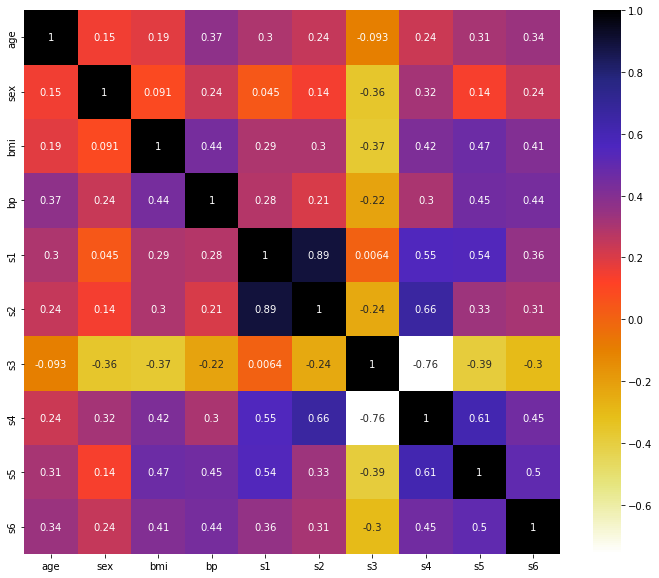

In [10]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [11]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

2

In [13]:
corr_features

{'s2', 's4'}

In [14]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,age,sex,bmi,bp,s1,s3,s5,s6
362,0.019913,0.050680,0.104809,0.070073,-0.035968,-0.024993,0.003712,0.040343
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,-0.017629,0.070211,0.007207
271,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.039719,-0.018118,0.007207
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,-0.017629,-0.038459,-0.038357
400,-0.023677,-0.044642,0.045529,0.090730,-0.018080,0.070730,-0.034524,-0.009362
...,...,...,...,...,...,...,...,...
328,-0.038207,-0.044642,0.067085,-0.060757,-0.029088,-0.010266,-0.001499,0.019633
414,0.081666,0.050680,0.006728,-0.004523,0.109883,-0.032356,0.054724,0.007207
421,0.038076,0.050680,0.016428,0.021872,0.039710,-0.043401,0.049769,0.015491
361,0.041708,-0.044642,-0.007284,0.028758,-0.042848,0.052322,-0.072128,0.023775


## Spearman’s Rank Correlation Coefficient

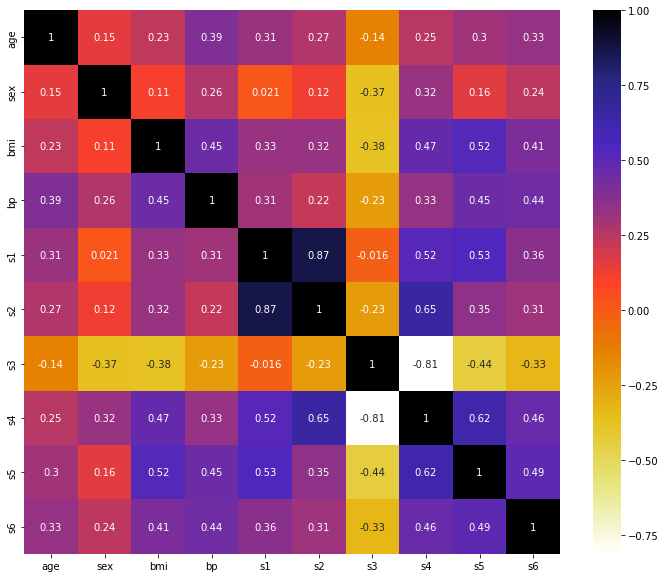

In [15]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [16]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method='spearman')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [17]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

2

In [18]:
corr_features

{'s2', 's4'}

In [19]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,age,sex,bmi,bp,s1,s3,s5,s6
362,0.019913,0.050680,0.104809,0.070073,-0.035968,-0.024993,0.003712,0.040343
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,-0.017629,0.070211,0.007207
271,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.039719,-0.018118,0.007207
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,-0.017629,-0.038459,-0.038357
400,-0.023677,-0.044642,0.045529,0.090730,-0.018080,0.070730,-0.034524,-0.009362
...,...,...,...,...,...,...,...,...
328,-0.038207,-0.044642,0.067085,-0.060757,-0.029088,-0.010266,-0.001499,0.019633
414,0.081666,0.050680,0.006728,-0.004523,0.109883,-0.032356,0.054724,0.007207
421,0.038076,0.050680,0.016428,0.021872,0.039710,-0.043401,0.049769,0.015491
361,0.041708,-0.044642,-0.007284,0.028758,-0.042848,0.052322,-0.072128,0.023775


## Kendall’s Rank Correlation Coefficient

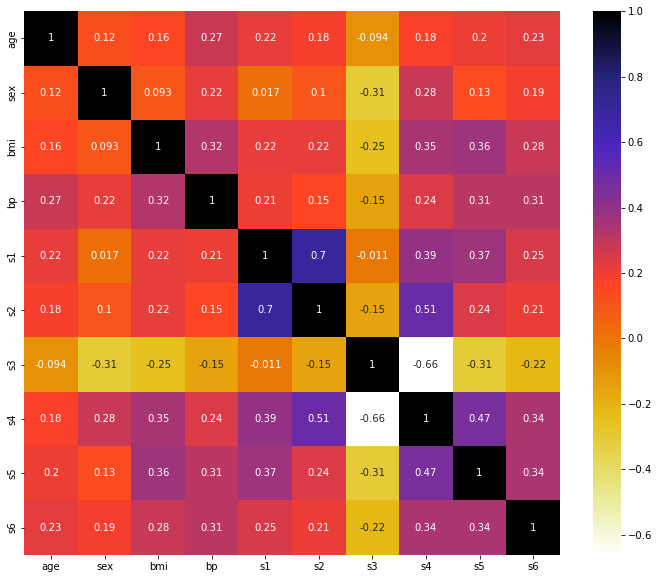

In [20]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr(method='kendall')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [21]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method='kendall')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

1

In [23]:
corr_features

{'s2'}

In [24]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,age,sex,bmi,bp,s1,s3,s4,s5,s6
362,0.019913,0.050680,0.104809,0.070073,-0.035968,-0.024993,-0.002592,0.003712,0.040343
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,-0.017629,0.034309,0.070211,0.007207
271,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.039719,-0.002592,-0.018118,0.007207
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,-0.017629,-0.002592,-0.038459,-0.038357
400,-0.023677,-0.044642,0.045529,0.090730,-0.018080,0.070730,-0.039493,-0.034524,-0.009362
...,...,...,...,...,...,...,...,...,...
328,-0.038207,-0.044642,0.067085,-0.060757,-0.029088,-0.010266,-0.002592,-0.001499,0.019633
414,0.081666,0.050680,0.006728,-0.004523,0.109883,-0.032356,0.091875,0.054724,0.007207
421,0.038076,0.050680,0.016428,0.021872,0.039710,-0.043401,0.071210,0.049769,0.015491
361,0.041708,-0.044642,-0.007284,0.028758,-0.042848,0.052322,-0.076395,-0.072128,0.023775
